In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [81]:
import pandas as pd
import os

csv_file_name = 'WA_Fn-UseC_-Telco-Customer-Churn.csv' 

project_dir = r'C:\Users\Brooz\my_churn_app' 

file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)

print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [83]:
df.describe(include="all")

customerID gender  SeniorCitizen Partner Dependents       tenure  \
count         7043   7043    7043.000000    7043       7043  7043.000000   
unique        7043      2            NaN       2          2          NaN   
top     3186-AJIEK   Male            NaN      No         No          NaN   
freq             1   3555            NaN    3641       4933          NaN   
mean           NaN    NaN       0.162147     NaN        NaN    32.371149   
std            NaN    NaN       0.368612     NaN        NaN    24.559481   
min            NaN    NaN       0.000000     NaN        NaN     0.000000   
25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
max            NaN    NaN       1.000000     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity  ...  \
count          7043          7043            7043           7043  ...   
unique            2             3               3              3  ...   
top             Yes            No     Fiber optic             No  ...   
freq           6361          3390            3096           3498  ...   
mean            NaN           NaN             NaN            NaN  ...   
std             NaN           NaN             NaN            NaN  ...   
min             NaN           NaN             NaN            NaN  ...   
25%             NaN           NaN             NaN            NaN  ...   
50%             NaN           NaN             NaN            NaN  ...   
75%             NaN           NaN             NaN            NaN  ...   
max             NaN           NaN             NaN            NaN  ...   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7043        7043        7043            7043   
unique                3           3           3               3   
top                  No          No          No              No   
freq               3095        3473        2810            2785   
mean                NaN         NaN         NaN             NaN   
std                 NaN         NaN         NaN             NaN   
min                 NaN         NaN         NaN             NaN   
25%                 NaN         NaN         NaN             NaN   
50%                 NaN         NaN         NaN             NaN   
75%                 NaN         NaN         NaN             NaN   
max                 NaN         NaN         NaN             NaN   

              Contract PaperlessBilling     PaymentMethod MonthlyCharges  \
count             7043             7043              7043    7043.000000   
unique               3                2                 4            NaN   
top     Month-to-month              Yes  Electronic check            NaN   
freq              3875             4171              2365            NaN   
mean               NaN              NaN               NaN      64.761692   
std                NaN              NaN               NaN      30.090047   
min                NaN              NaN               NaN      18.250000   
25%                NaN              NaN               NaN      35.500000   
50%                NaN              NaN               NaN      70.350000   
75%                NaN              NaN               NaN      89.850000   
max                NaN              NaN               NaN     118.750000   

        TotalCharges Churn  
count           7043  7043  
unique          6531     2  
top             20.2    No  
freq              11  5174  
mean             NaN   NaN  
std              NaN   NaN  
min              NaN   NaN  
25%              NaN   NaN  
50%              NaN   NaN  
75%              NaN   NaN  
max              NaN   NaN  

[11 rows x 21 columns]

In [84]:
df = df.drop(['customerID'], axis = 1)
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [85]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [86]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [87]:
df["Churn"].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [88]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [89]:
df.drop(labels=df[df["tenure"]==0].index,axis=0,inplace=True)
df[df["tenure"]==0].index

Index([], dtype='int64')

In [90]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [91]:
df["Churn"]=df["Churn"].map({"No":0,"Yes":1})
df["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [92]:
churn_analysis = df.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack()
churn_analysis

Churn                 0         1
SeniorCitizen                    
0              0.763497  0.236503
1              0.583187  0.416813

In [93]:
df["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [94]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

tenure  MonthlyCharges
count  7032.000000     7032.000000
mean     32.421786       64.798208
std      24.545260       30.085974
min       1.000000       18.250000
25%       9.000000       35.587500
50%      29.000000       70.350000
75%      55.000000       89.862500
max      72.000000      118.750000

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

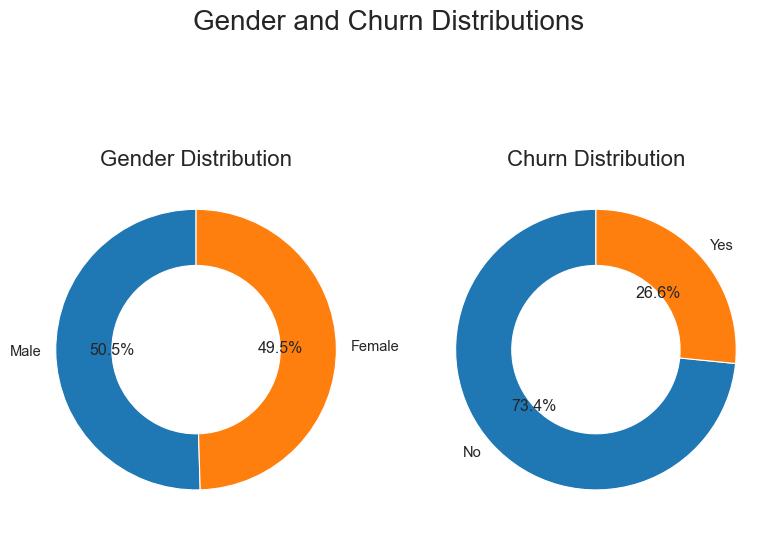

In [96]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

# محاسبه تعداد هر دسته
gender_counts = df['gender'].value_counts()
churn_counts = df['Churn'].value_counts()

# ایجاد دو ساب‌پلات برای نمودارهای پای
fig, axes = plt.subplots(1, 2, figsize=(8,6)) # 1 ردیف، 2 ستون

# نمودار جنسیتی
wedges_gender, texts_gender, autotexts_gender = axes[0].pie(gender_counts, labels=g_labels, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
axes[0].set_title('Gender Distribution', fontsize=16)
 # اطمینان از اینکه دایره کامل است

# نمودار Churn
wedges_churn, texts_churn, autotexts_churn = axes[1].pie(churn_counts, labels=c_labels, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
axes[1].set_title('Churn Distribution', fontsize=16)
 # اطمینان از اینکه دایره کامل است

# عنوان اصلی برای کل نمودار
fig.suptitle("Gender and Churn Distributions", fontsize=20, y=1.02) # y برای تنظیم موقعیت عنوان اصلی

plt.tight_layout(rect=[0, 0, 1, 0.98]) # تنظیم طرح‌بندی برای جلوگیری از همپوشانی عنوان اصلی
plt.show()

In [97]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

Series([], Name: Churn, dtype: int64)

In [98]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

Series([], Name: Churn, dtype: int64)

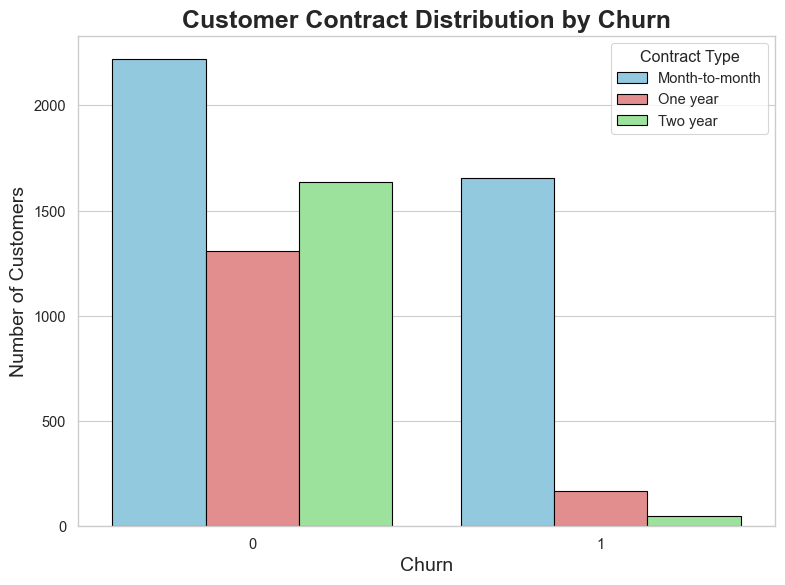

In [99]:

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)

colors = {'Month-to-month': 'skyblue', 'One year': 'lightcoral', 'Two year': 'lightgreen'}

plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x='Churn',
    hue='Contract',
    palette=colors,
    edgecolor='black'
)

plt.title("Customer Contract Distribution by Churn", fontsize=18, weight='bold')
plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)


plt.legend(title="Contract Type", loc='upper right', frameon=True)

plt.tight_layout()
plt.show()

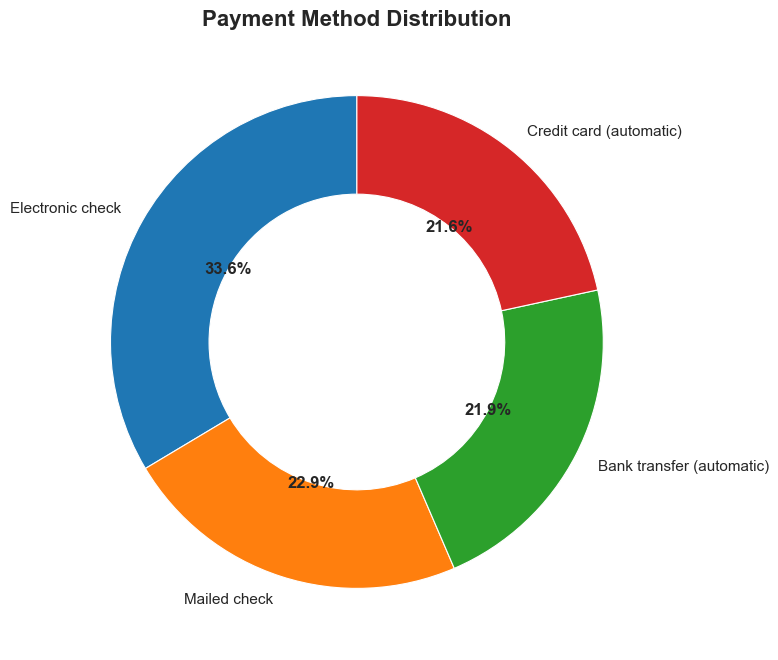

In [100]:

file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)

labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))


wedges, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.1f%%',startangle=90, wedgeprops={'width': 0.4})

ax.set_title("Payment Method Distribution", fontsize=16, weight='bold')

# اطمینان از اینکه نمودار دایره‌ای کامل باشد
ax.set_aspect('equal')

# تنظیم اندازه فونت درصدها (اختیاری)
plt.setp(autotexts, size=12, weight="bold")
plt.setp(texts, size=11)

plt.show()


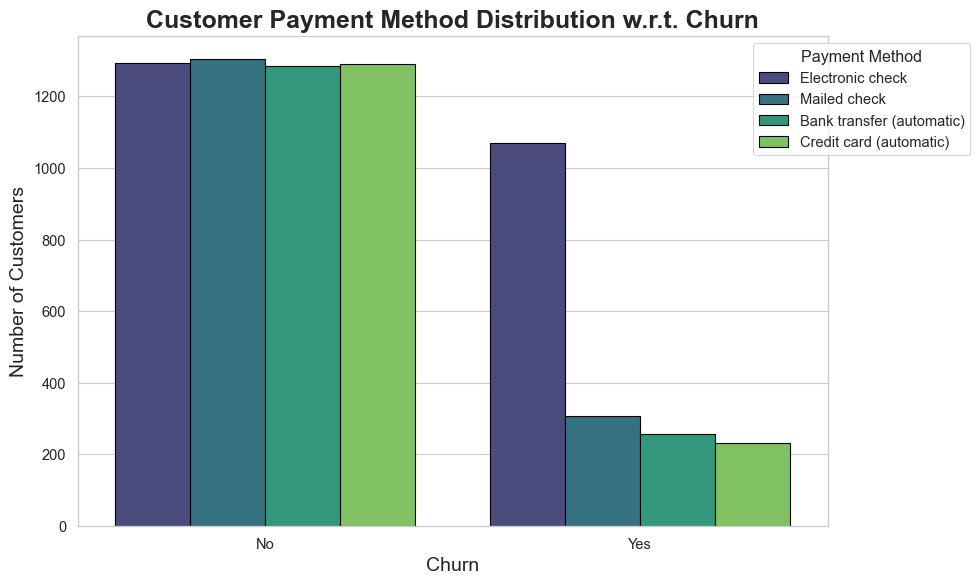

In [101]:

file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)


sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)

plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='Churn',
    hue='PaymentMethod',
    palette='viridis',  # می‌توانید از پالت‌های دیگر نیز استفاده کنید
    edgecolor='black'
)

# تنظیم عنوان و برچسب‌های نمودار
plt.title("Customer Payment Method Distribution w.r.t. Churn", fontsize=18, weight='bold')
plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)

# تنظیم راهنما
plt.legend(title="Payment Method", loc='upper right', bbox_to_anchor=(1.2, 1), frameon=True)

# نمایش نمودار
plt.tight_layout()
plt.show()

In [102]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [103]:
df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       993
Fiber optic      No       910
No               No       722
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [104]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       969
Fiber optic      No       889
No               No       691
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

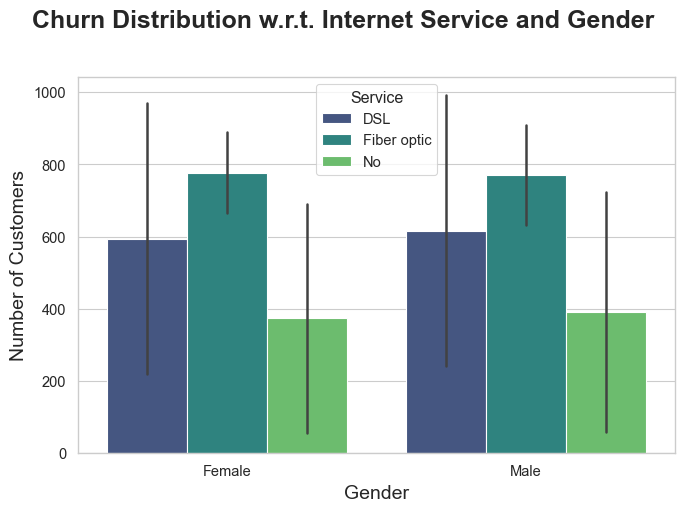

In [105]:
file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)

df_combined = df.groupby(['gender', 'InternetService', 'Churn']).size().reset_index(name='Count')
df_combined = df_combined.rename(columns={'gender': 'Gender', 'InternetService': 'Service'})

# --- بخش 2: رسم نمودار ---
plt.figure(figsize=(7,5))
sns.barplot(data=df_combined, x='Gender', y='Count', hue='Service', palette='viridis')

plt.suptitle("Churn Distribution w.r.t. Internet Service and Gender", fontsize=18, weight='bold', y=1.02)
plt.ylabel("Number of Customers", fontsize=14)
plt.xlabel("Gender", fontsize=14)

plt.tight_layout()
plt.show()

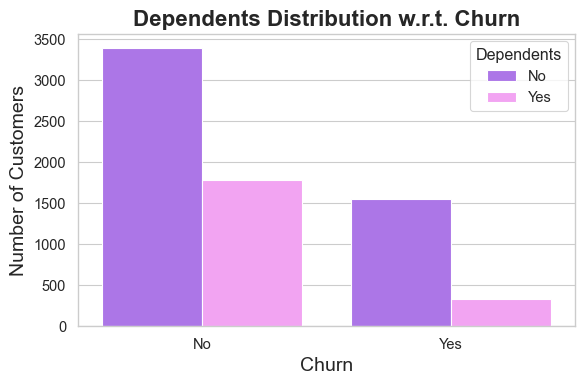

In [106]:
file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)


color_map_seaborn = {"Yes": "#FF97FF", "No": "#AB63FA"}

plt.figure(figsize=(6,4))

sns.countplot(data=df, x='Churn', hue='Dependents', palette=color_map_seaborn)

plt.title("Dependents Distribution w.r.t. Churn", fontsize=16, weight='bold')

plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)

plt.legend(title="Dependents", loc='upper right')

plt.tight_layout()
plt.show()

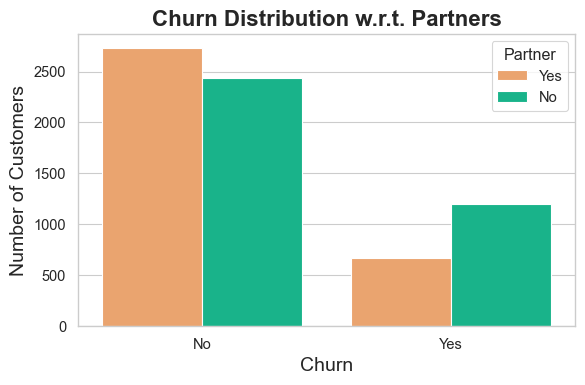

In [107]:
file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)


color_map_seaborn = {"Yes": '#FFA15A', "No": '#00CC96'}

plt.figure(figsize=(6,4))

sns.countplot(data=df, x='Churn', hue='Partner', palette=color_map_seaborn)

plt.title("Churn Distribution w.r.t. Partners", fontsize=16, weight='bold')

plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)

plt.legend(title="Partner", loc='upper right')

plt.tight_layout()
plt.show()

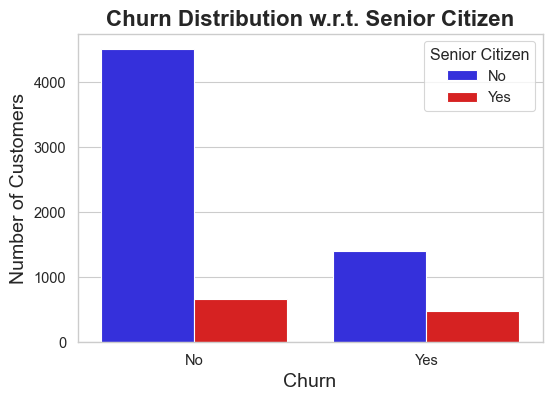

In [108]:
file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)


df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

color_map_seaborn = {"Yes": "#F40404C4", "No": "#1A13F7"}

plt.figure(figsize=(6,4))

sns.countplot(data=df, x='Churn', hue='SeniorCitizen', palette=color_map_seaborn)

plt.title("Churn Distribution w.r.t. Senior Citizen", fontsize=16, weight='bold')

plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)

plt.legend(title="Senior Citizen", loc='upper right')

plt.show()

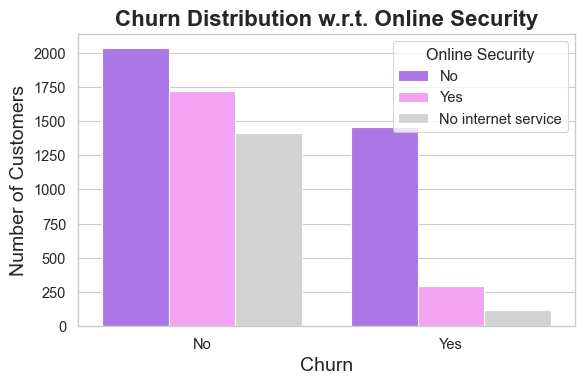

In [109]:
file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)


color_map_seaborn = {"Yes": "#FF97FF", "No": "#AB63FA", "No internet service": "#D3D3D3"}

plt.figure(figsize=(6,4))

sns.countplot(data=df, x='Churn', hue='OnlineSecurity', palette=color_map_seaborn)

plt.title("Churn Distribution w.r.t. Online Security", fontsize=16, weight='bold')

plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)

plt.legend(title="Online Security", loc='upper right')

plt.tight_layout()
plt.show()

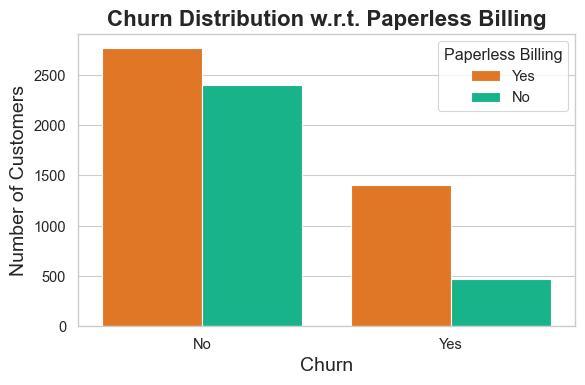

In [110]:
file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)

color_map_seaborn = {"Yes": "#FF7308", "No": '#00CC96'}

plt.figure(figsize=(6,4))

sns.countplot(data=df, x='Churn', hue='PaperlessBilling', palette=color_map_seaborn)

plt.title("Churn Distribution w.r.t. Paperless Billing", fontsize=16, weight='bold')

plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)

plt.legend(title="Paperless Billing", loc='upper right')

plt.tight_layout()
plt.show()

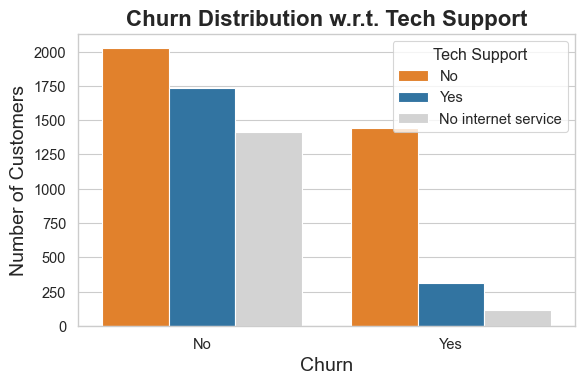

In [111]:
file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)

color_map_seaborn = {"Yes": '#1f77b4', "No": '#ff7f0e', "No internet service": '#d3d3d3'}

plt.figure(figsize=(6,4))

sns.countplot(data=df, x='Churn', hue='TechSupport', palette=color_map_seaborn)

plt.title("Churn Distribution w.r.t. Tech Support", fontsize=16, weight='bold')

plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)

plt.legend(title="Tech Support", loc='upper right')

plt.tight_layout()
plt.show()

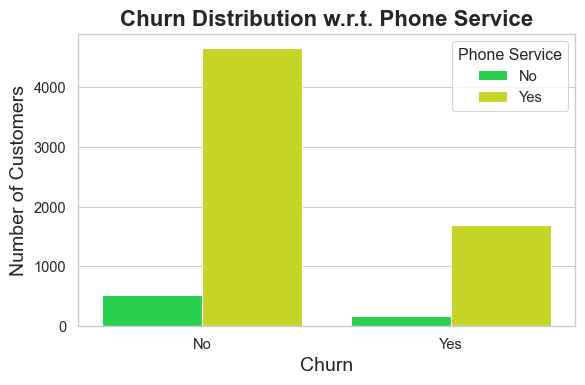

In [112]:
file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)


color_map_seaborn = {"Yes": "#DEF10D", "No": "#0EEA3E"}

plt.figure(figsize=(6,4))

sns.countplot(data=df, x='Churn', hue='PhoneService', palette=color_map_seaborn)

plt.title("Churn Distribution w.r.t. Phone Service", fontsize=16, weight='bold')

plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)

plt.legend(title="Phone Service", loc='upper right')

plt.tight_layout()
plt.show()

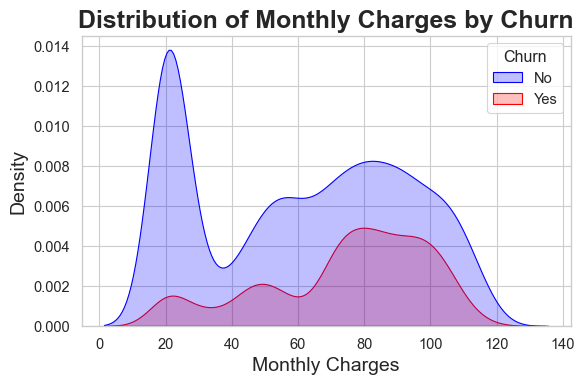

In [113]:
file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)

plt.figure(figsize=(6,4))

sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, palette=['blue', 'red'])

plt.title("Distribution of Monthly Charges by Churn", fontsize=18, weight='bold')

plt.xlabel("Monthly Charges", fontsize=14)
plt.ylabel("Density", fontsize=14)

plt.tight_layout()
plt.show()

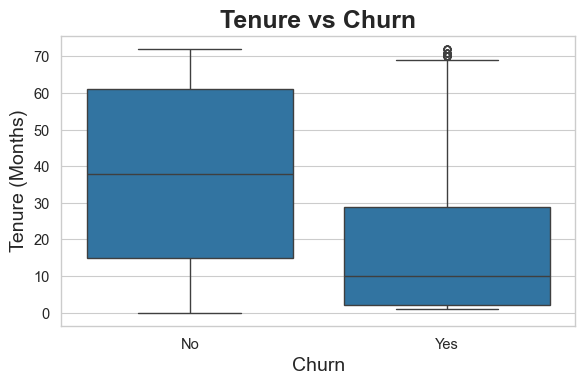

In [114]:
file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)

plt.figure(figsize=(6,4))

sns.boxplot(data=df, x='Churn', y='tenure')

plt.title("Tenure vs Churn", fontsize=18, weight='bold')

plt.xlabel("Churn", fontsize=14)
plt.ylabel("Tenure (Months)", fontsize=14)

plt.tight_layout()
plt.show()

In [115]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series
df = df.apply(lambda x: object_to_int(x))
df.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        5375       0              0        1           0       1   
1        3962       1              0        0           0      34   
2        2564       1              0        0           0       2   
3        5535       1              0        0           0      45   
4        6511       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85          2505      0  
1                 0              3           56.95          1466      0  
2                 1              3           53.85           157      1  
3                 0              0           42.30          1400      0  
4                 1              2           70.70           925      1  

[5 rows x 21 columns]

In [116]:
# كدام ويزكي ها بيشتر به خروج مشتري ربط دارد
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

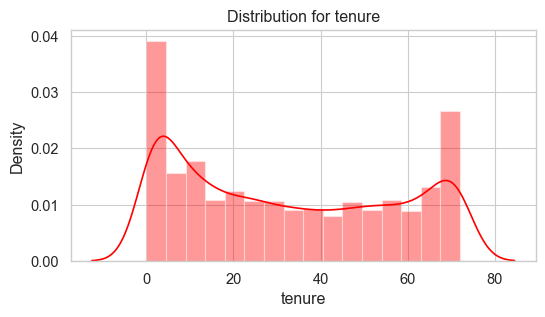

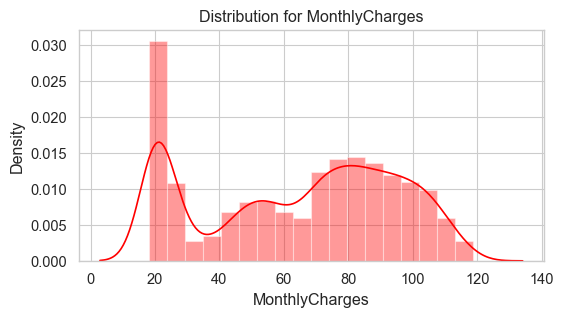

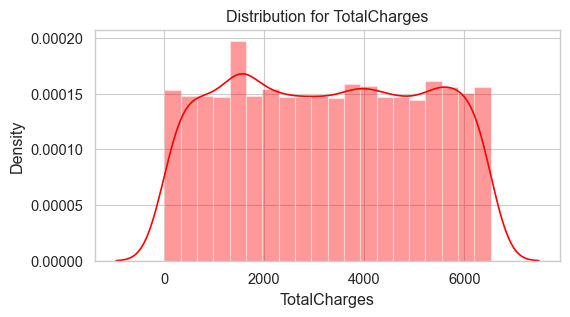

In [117]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)


def distplot(feature, frame, color='r'):
    plt.figure(figsize=(6,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

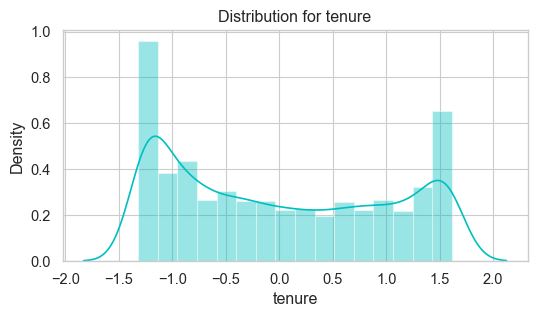

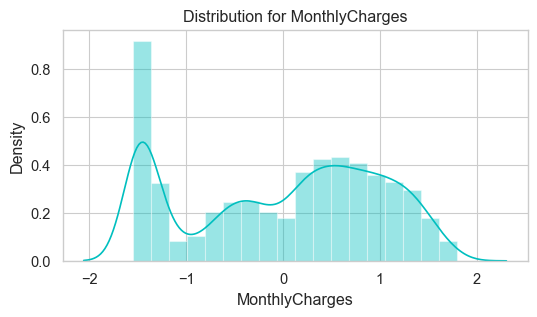

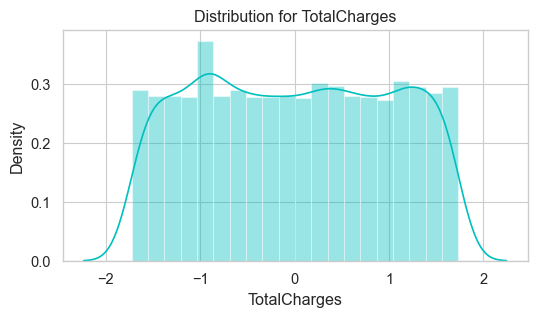

In [118]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

In [119]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [120]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# machine learning

In [121]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7169900615238997


In [122]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83      1552
           1       0.34      0.07      0.12       561

    accuracy                           0.72      2113
   macro avg       0.54      0.51      0.47      2113
weighted avg       0.63      0.72      0.64      2113



In [123]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)


SVM accuracy is : 0.73450070989115


In [124]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1552
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113



In [125]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features='sqrt',
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))  

0.8002839564600095


In [126]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.67      0.49      0.56       561

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



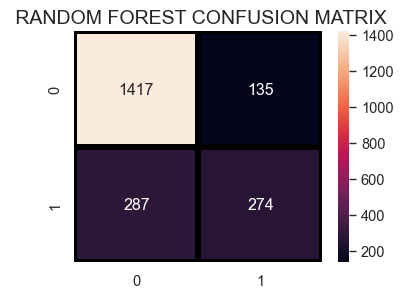

In [127]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

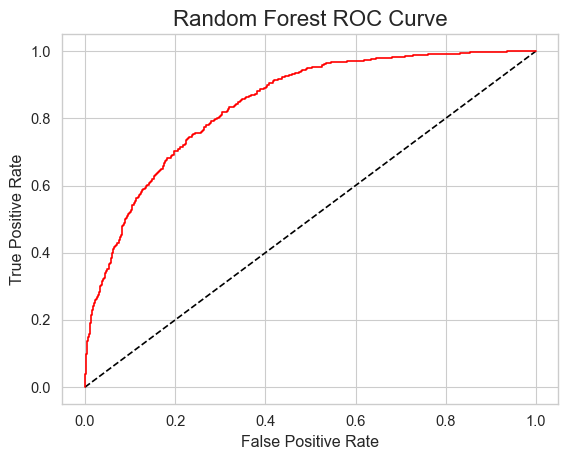

In [128]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show()

In [129]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7927117841930904


In [130]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1552
           1       0.62      0.57      0.60       561

    accuracy                           0.79      2113
   macro avg       0.73      0.72      0.73      2113
weighted avg       0.79      0.79      0.79      2113



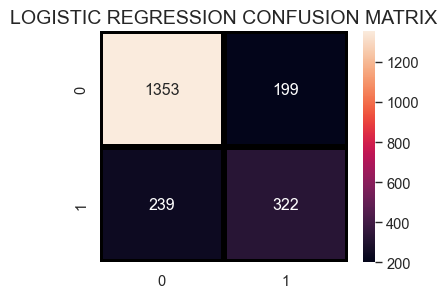

In [131]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

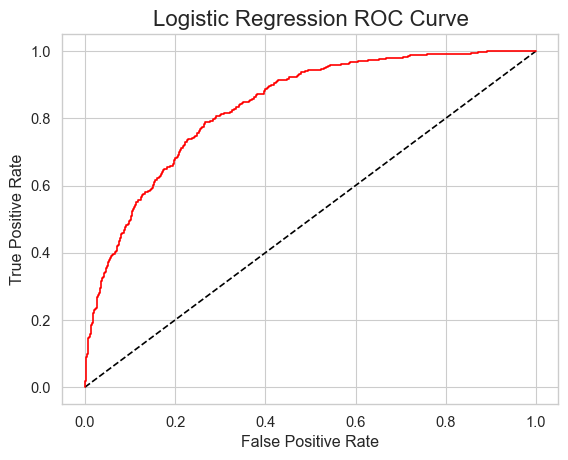

In [132]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show()

In [133]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7307146237576905


In [134]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1552
           1       0.49      0.53      0.51       561

    accuracy                           0.73      2113
   macro avg       0.66      0.67      0.66      2113
weighted avg       0.74      0.73      0.73      2113



In [135]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)


AdaBoost Classifier accuracy


0.7969711310932324

In [136]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1552
           1       0.63      0.57      0.60       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



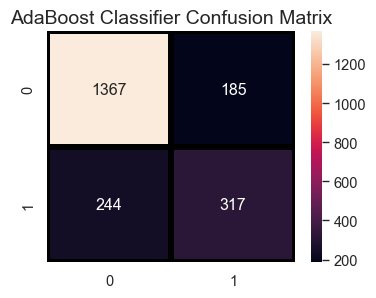

In [137]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

In [138]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.7974443918599148


In [139]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



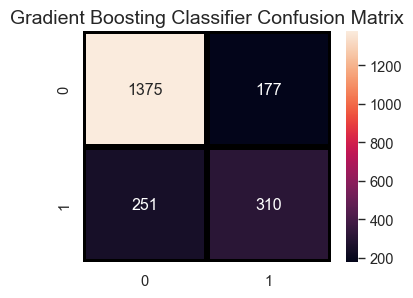

In [140]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

In [141]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.8035967818267865


In [142]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1552
           1       0.65      0.58      0.61       561

    accuracy                           0.80      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.80      0.80      2113



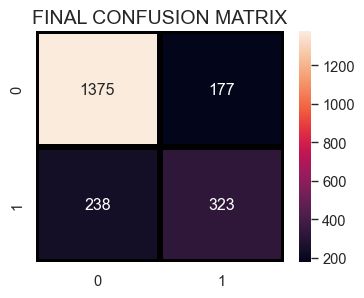

In [143]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

In [144]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()

eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')

param_grid = {
    'gbc__n_estimators': [100, 200],
    'gbc__max_depth': [3, 5],
    'lr__C': [0.1, 1.0, 10.0],
    'abc__n_estimators': [50, 100]
}


grid_search = GridSearchCV(estimator=eclf1, param_grid=param_grid, cv=5, scoring='recall_weighted', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best Weighted Recall Score: ", grid_search.best_score_)

best_voting_model = grid_search.best_estimator_

Best parameters found:  {'abc__n_estimators': 100, 'gbc__max_depth': 5, 'gbc__n_estimators': 100, 'lr__C': 0.1}
Best Weighted Recall Score:  0.8079107505070994


In [145]:
import joblib
import os

# فرض می‌کنیم 'best_voting_model' مدل نهایی و آموزش دیده شما است
# و X_train و y_train داده‌های آموزشی شما هستند
# --- کد آموزش مدل را در اینجا قرار دهید ---

# آموزش نهایی مدل
# ...

# مسیر دقیق و کامل برای ذخیره‌سازی مدل
output_path = os.path.join('C:\\Users\\Brooz\\my_churn_app', 'voting_classifier_final_model.pkl')

# ذخیره مدل
joblib.dump(best_voting_model, output_path)

print("مدل با موفقیت ذخیره شد.")
print(f"مسیر دقیق ذخیره‌سازی فایل: {output_path}")

مدل با موفقیت ذخیره شد.
مسیر دقیق ذخیره‌سازی فایل: C:\Users\Brooz\my_churn_app\voting_classifier_final_model.pkl


In [146]:
import joblib

# استفاده از مدل بهینه‌شده از مرحله قبل
final_model = best_voting_model

# آموزش نهایی مدل بر روی کل داده‌های آموزشی
# این مرحله قبلاً در GridSearchCV انجام شده است، اما می‌توانید مجدداً آن را اجرا کنید
# تا مطمئن شوید که روی کل داده‌ها آموزش دیده است.
final_model.fit(X_train, y_train)

# ذخیره مدل آموزش‌دیده در یک فایل
joblib.dump(final_model, 'voting_classifier_final_model.pkl.csv')

print("VotingClassifier final model has been trained and saved successfully.")


VotingClassifier final model has been trained and saved successfully.
